### CS156 Location Based Assignment:
#### Dennis Kageni, Spring 2020
#### Assignment instructions:
##### Principle Landmarks
For this LBA you will need to take at least 20 photos of your favorite landmark. These photos need to be as close to identical as possible, but they need to be taken during the day and over a period of at least 4 hours. Something that creates a time-lapse of your favorite landmark would be ideal, but is not necessary.

Now write code that does the following:

* Processes all photos down to a size not exceeding 512 pixels in either width or height
* Using principal components analysis (PCA) project your images down to a 2 dimensional representation
* Visually inspect the 2D locations of each photo in the new space
* Show the reconstruction from each low-dimensional representation
* Finally, pick a point that is far away from any known location and plot its reconstruction
* If you perform any other image processing steps, please clearly note them in your report. This is meant to be a reasonably light-hearted assignment, so feel free to pick irreverent landmarks or use interesting image processing techniques to find artistic reconstructions. You may also try to conduct this assignment in three dimensions, but no higher!

Hand in a single PDF containing all your results and a short discussion of your findings.

Make sure to include:

* at least 10 of your small photos and their associated reconstructions
* the scatterplot of all images in the 2D space, and where your new point is
* the reconstruction from your new point

For this assignment, I took photos 39 of the Monument to José de San Martín that's at the center of Plaza San Martín; a popular park in our neighborhood. These were taken over two days and span 6 hours (with the earliest photo taken at 10am and the lasest photo taken at 7:30om). These photos are almost identical with the exception of lighting conditions and that some photos capture nearby pedestrians and cyclists. I took the following steps for image processing:

    1. Resized all the images into 160 X 320 pixels
    2. Converted the images into a numpy array
    3. Flattened the numpy array
    4. Proceeded to implementing the PCA analysis
    
Flattening the images resulted in the photos being reduced into 153600 dimensions

In [ ]:
from skimage.io import imread_collection
from skimage.transform import resize
from glob import glob

In [ ]:
# path to files
lba_dir = glob('LBA_pics/*.jpeg')

#creating a collection with the available images
lba_pics = imread_collection(lba_dir)
print(f"No. of pictures: {len(lba_pics)}")
print(f"Image dimensions: {lba_pics[0].shape}")

No. of pictures: 39
Image dimensions: (1555, 3024, 3)


In [ ]:
#height and width of resized image
new_height = 160
new_width = 320
    
#resize the images
pics_resized = [resize(lba_pics[i],(new_height,new_width), mode='constant') for i in range(len(lba_pics))]


Text(0.5, 1.0, 'Resized Picture: Dimensions = (160, 320, 3)')

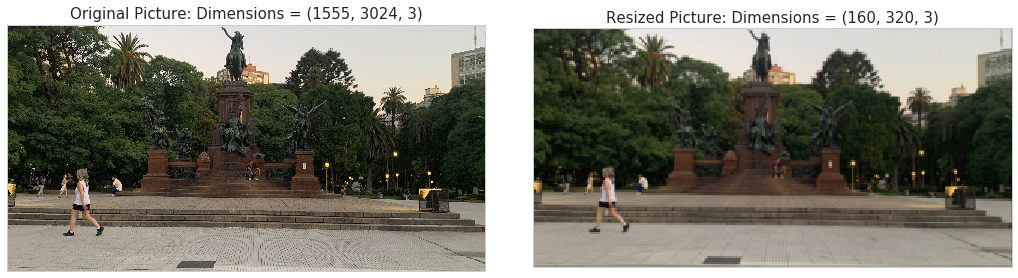

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

#peek at the resized images and compare them to the original images
fig, ax = plt.subplots(1, 2, figsize=(18, 6),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
ax[0].imshow(lba_pics[0])
ax[0].set_title(f"Original Picture: Dimensions = {lba_pics[0].shape}",size=15)


ax[1].imshow(pics_resized[0])
ax[1].set_title(f"Resized Picture: Dimensions = {pics_resized[0].shape}",size=15)

In [ ]:
import numpy as np
images = np.asarray(pics_resized) # convert images into array
print("Initial array:", images.shape)

# reshape images into flattened array
reshaped_img = images.reshape(39, images.shape[1] * images.shape[2] * images.shape[3])
print("Flattened array:", reshaped_img.shape)

Initial array: (39, 160, 320, 3)
Flattened array: (39, 153600)


#### 2. Using principal components analysis, project your images down to a 2 dimensional representation

The next step was to move from 153600 dimensions to 2 dimensions using principal component analysis. Before that, I calculated that the first two components preserve about 44% of the original data. Already, we can expect that our reconstructions will produce images of significantly lower quality.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
# Perform PCA
pca_check = PCA()
pca_check.fit(reshaped_img)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

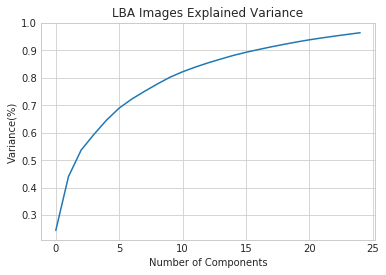

In [ ]:
# Plot explained variace over n_components
plt.title('LBA Images Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel("Variance(%)")
plt.plot(np.cumsum(pca_check.explained_variance_ratio_[:25]))
plt.show()


In [ ]:
print("Variance explained by the first two principal components: " \
      + str(np.sum(pca_check.explained_variance_ratio_[:2])) + "%.")

Variance explained by the first two principal components: 0.44026762946267983%.


In [ ]:
# fitting the datapoints into the PCA model
pca = PCA(n_components=2)
pca.fit(reshaped_img)

# transforming our datapoints and saving them into a dataframe
pca_data = pca.transform(reshaped_img)
pca_df = pd.DataFrame(data = pca_data, columns = ['Component_1', 'Component_2'])
pca_df.head()

,Component_1,Component_2
0,-6.308719,-27.332900
1,-10.206323,-27.657540
2,-17.189809,-26.520257
3,-12.498939,-26.674903
4,-21.151174,-21.177554


#### 3. Visually inspect the 2D locations of each photo in the new space

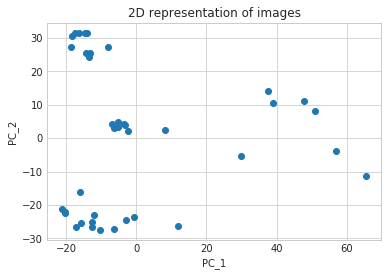

In [ ]:
plt.scatter(pca_df['Component_1'], pca_df['Component_2'])
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('2D representation of images')
plt.show()

The first observation is the presence of clusters. This can be explained by the fact that I went out to take photos exactly four times over the two days. So it's not suprising that similar images would be close to each other. There's also a reasonable spread on both the x and y-axes so it would be interesting to observe which component best explains the difference in the photos such as lighting, presence of bystanders, minor differences in the position since I did not stand at the exact position each time, among others. 

#### 4. Show the reconstruction from each low-dimensional representation

In [ ]:
reconstructed_img = pca.inverse_transform(pca_data)


Text(0, 0.5, 'Reconstruction')

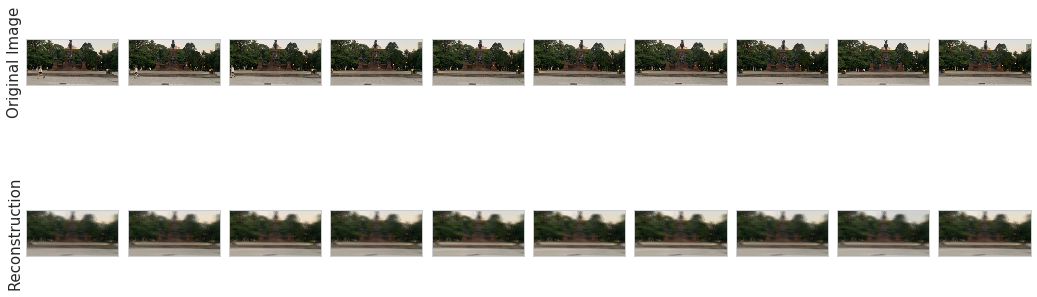

In [ ]:
fig, ax = plt.subplots(2, 10, figsize=(18, 6),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(reshaped_img[i].reshape(new_height,new_width,3))
    ax[1, i].imshow(reconstructed_img[i].reshape(new_height,new_width,3))
    
ax[0, 0].set_ylabel('Original Image',size=15)
ax[1, 0].set_ylabel('Reconstruction',size=15)

As expected, the reconstuctions using two principal componests have lost a lot of image sharpness. However, we can still make out features of the monoment as well as the trees in the background and pavement in the foreground. 

In [ ]:
# now, I'd like to observe the impact of moving along the x and y-axes
positive_x_direction = np.array([[0,0],[50,0],[100,0],[150,0],[200,0],[250,0],[300,0]])
negative_x_direction = np.array([[0,0], [-50,0], [-100,0],[-150,0],[-200,0],[-250,0],[-300,0]])
positive_y_direction = np.array([[0,0],[0,50],[0,100],[0,150],[0,200],[0,250],[0,300]])
negative_y_direction = np.array([[0,0],[0,-50],[0,-100],[0,-150],[0,-200],[0,-250],[0,-300]])

# adding points that are further away. To be used in question 5
far_points = np.array([[300,300], [300,-300], [-300, 300], [-300, -300]])

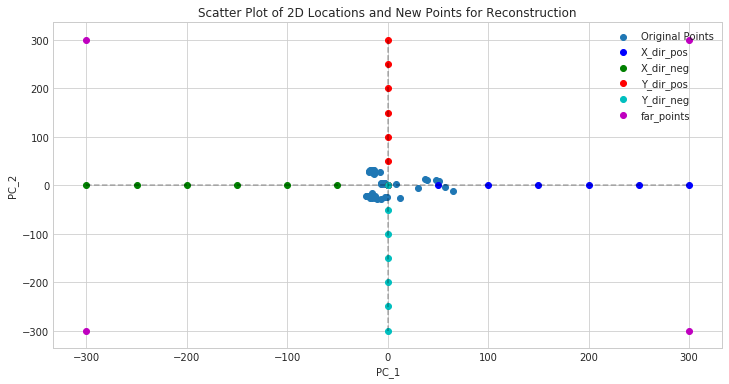

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(pca_df['Component_1'], pca_df['Component_2'], label="Original Points")

#plot x points and y points
plt.scatter(positive_x_direction[:,0], positive_x_direction[:,1], color='b', label="X_dir_pos")
plt.scatter(negative_x_direction[:,0], negative_x_direction[:,1], color='g', label="X_dir_neg")
plt.scatter(positive_y_direction[:,0], positive_y_direction[:,1], color='r', label="Y_dir_pos")
plt.scatter(negative_y_direction[:,0], negative_y_direction[:,1], color='c', label="Y_dir_neg")

# plot far points
plt.scatter(far_points[:,0], far_points[:,1], color='m', label="far_points")

#plot x-axis and y-axis
plt.hlines(0,-300,300, linestyle="dashed", alpha=0.3)
plt.vlines(0,-300,300, linestyle="dashed", alpha=0.3)

#title, labels, legend
plt.title("Scatter Plot of 2D Locations and New Points for Reconstruction")
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()

In [ ]:
import logging
logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)

In [ ]:
def pca_reconstruct(points, title):
    '''
    Takes in a numpy array of (x,y) points and reconstructs them according
    to the pca model defined earlier.
    '''
    reconstruction = pca.inverse_transform(points)

    plt.figure(figsize=(18,6), dpi=120)
    
    for i in range(len(reconstruction)):
        plt.subplot(1,len(reconstruction),i+1)
        if i == 0: plt.ylabel(f"{title}", size=15)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.title(f"PC Locations: {points[i]}", size=10)
        img = reconstruction[i].reshape(new_height,new_width,3)
        plt.imshow(img)
        
    plt.tight_layout()
    plt.show()

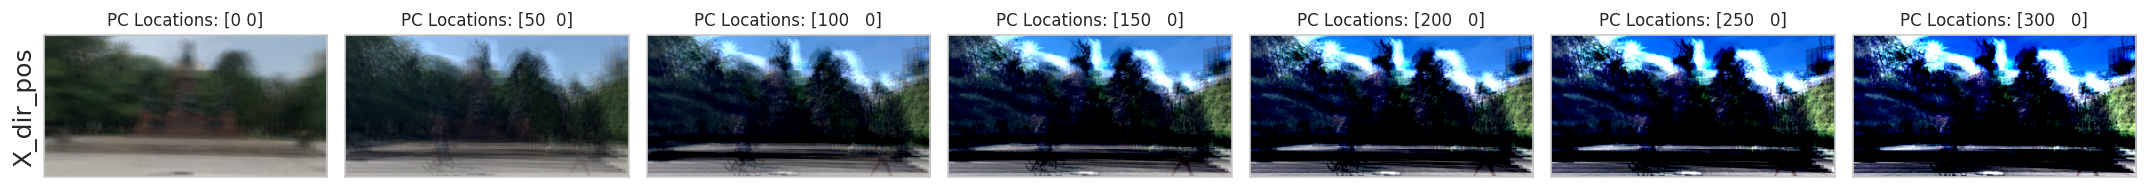

In [ ]:
#reconstruct images postive along the positive PC_1 direction
pca_reconstruct(positive_x_direction, "X_dir_pos")

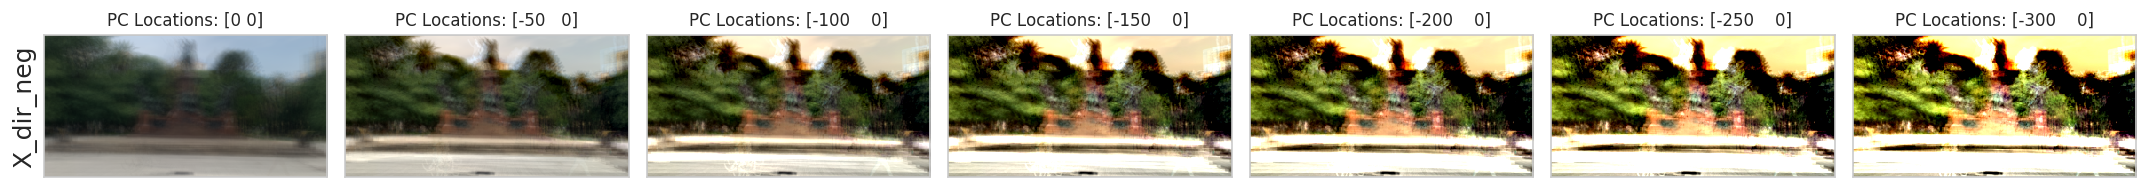

In [ ]:
#reconstruct images postive along the negative PC_1 direction
pca_reconstruct(negative_x_direction, "X_dir_neg")

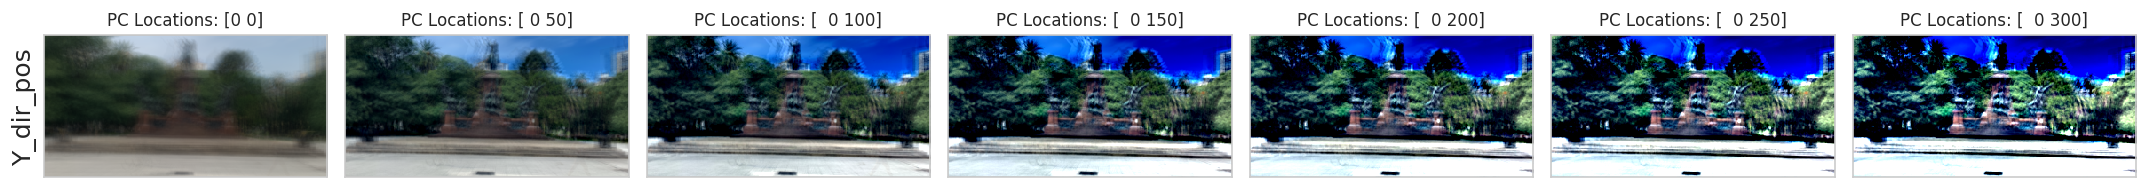

In [ ]:
#reconstruct images postive along the positive PC_2 direction
pca_reconstruct(positive_y_direction, "Y_dir_pos")

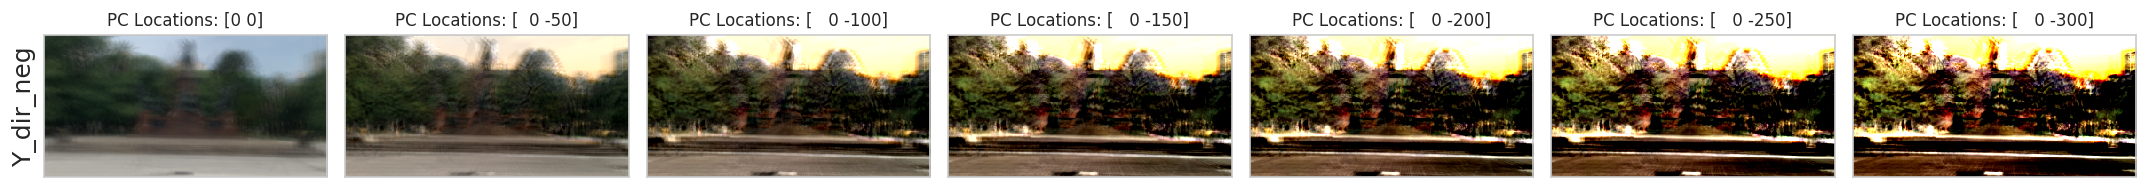

In [ ]:
#reconstruct images postive along the negative PC_2 direction
pca_reconstruct(negative_y_direction, "Y_dir_neg")

Looking at the reconstructions at various points of the x and y-axes, we can see that moving along the x-axis in the positive direction results in increasingly prominent black and blue hues. The green color is also subdued and we can no longer see the monument. On the other hand, moving in the negative direction results in increasingly prominent yellow hues. It still retains most of the green color. On the y-axis, we still observe blue hues in the positive direction and yellow hues in the negative direction but in comparision to the x-direction, it retains more features of the monument and it's surroundings.

5. Pick a point that is far away from any known location and plot its reconstruction

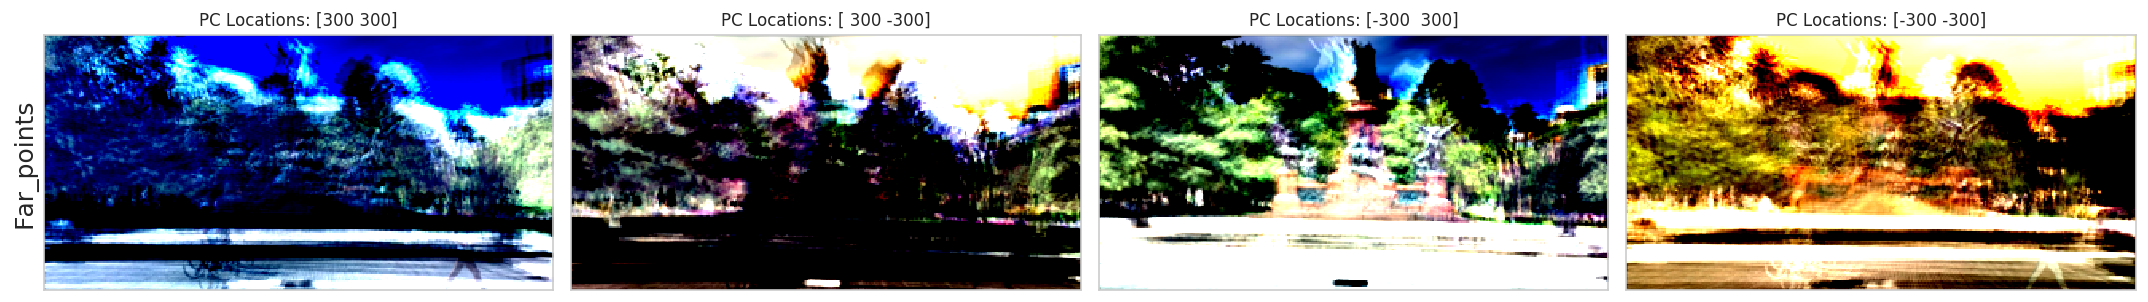

In [ ]:
pca_reconstruct(far_points, "Far_points")